In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from subprocess import call
%matplotlib inline

In [4]:
def get_data(file):
    if file.__class__ is dict:
        with open('./configs/config_tmp.json', 'w') as wr:
            json.dump(file, wr, indent=4)
        call(f'model.exe configs/config_tmp.json')
    return pd.read_csv('tmp/coordinates.csv'), pd.read_csv('tmp/collisions.csv')

In [39]:
config = {
    "types": [
        {
            "id" : 1,
            "mass" : 1
        },
        {
            "id" : 2,
            "mass" : 2
        }
    ],
    "particles" : [
        {
            "x" : 4,
            "xdot" : 1,
            "type id" : 1
        },
        {
            "x" : 6,
            "xdot" : -1,
            "type id" : 1
        },
        {
            "x" : 3,
            "xdot" : 2,
            "type id" : 1
        },
        {
            "x" : 7,
            "xdot" : -2,
            "type id" : 1
        },
        {
            "x" : 8,
            "xdot" : -3,
            "type id" : 1
        },
        {
            "x" : 2,
            "xdot" : 3,
            "type id" : 1
        }
    ],
    "border" : 20,
    "time" : 2
}

In [40]:
data, coll = get_data(config)

In [41]:
coll

,time,coll
0,1,15


In [ ]:
m = np.array([])

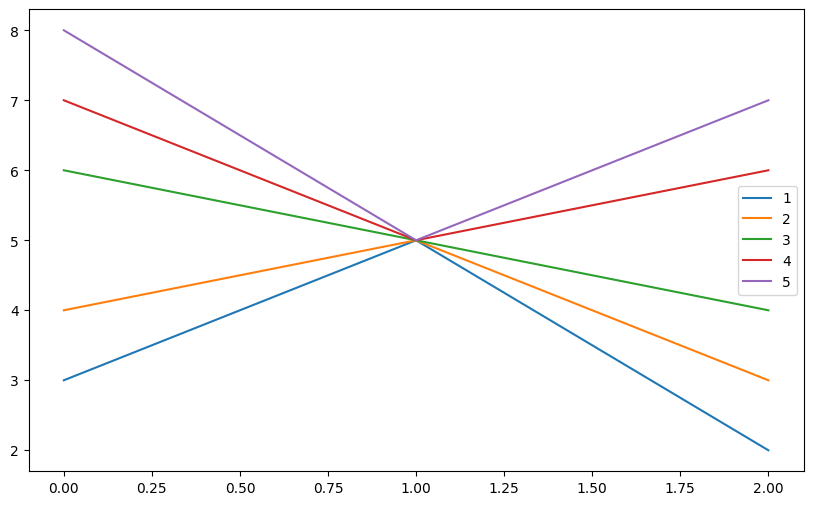

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data.time, data.x0, label='1')
ax.plot(data.time, data.x1, label='2')
ax.plot(data.time, data.x2, label='3')
ax.plot(data.time, data.x3, label='4')
ax.plot(data.time, data.x4, label='5')

plt.legend()
plt.show()

In [44]:
def f(n):
    return .5 * (1 + np.sqrt(1 + 8 * n))

In [47]:
f(np.array([3, 6, 10, 15]))

array([3., 4., 5., 6.])

In [45]:
particle_number = 50
concetration = 0.001

In [46]:
config = {
    'types' : [
        {
            'id' : 1,
            'mass' : 1,
            'radius' : 0.5
        },
        {
            'id' : 2,
            'mass' : 4,
            'radius' : 0.5
        }
    ],
    'particles' : [],
    'border' : concetration ** -1,
    'time step' : 0.1,
    'time' : 10
}

indent = (particle_number * concetration) ** -1

assert particle_number % 5 == 0
type_order = [1] * int(particle_number * 0.5) + [2] * int(particle_number * 0.5)
np.random.shuffle(type_order)

for type in config['types']:
    assert type['radius'] <= indent, 'Too much particles'

for i in range(particle_number):
    config['particles'].append({
        'x' : indent * (i + 1),
        'xdot' : np.random.normal(scale=5),
        'type id' : type_order[i]
    })